In [1]:
import sys
sys.path.append('..')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from utils import utils, cross_validation

In [2]:
nh3_nc = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

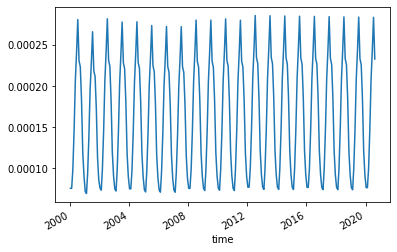

In [3]:
# MAX: lat(45.35 6) lon(10.25 17)
nh3 = utils.xarray2pandas(nh3_nc.agl, 6, 17)
nh3.plot()
plt.show()

In [7]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import statsmodels as sm
import matplotlib.pyplot as plt
from utils import utils
from statsmodels.tsa.statespace.sarimax import SARIMAX

n = len(nh3)
rmse = []
k = 18
p = 1
q = 1
d = 1
# TODO (AIC; BIC)

for i in range(k - 1):
    start = ((n * (i + 1)) / k )

    # Divide data into two dataset: training and validation
    train_set = nh3[0:int(start)].to_period('M')
    validation_set = nh3[int(start):int(start+int(n/k))].to_period('M')

    # Model fitting
    #model = sm.tsa.arima.model.ARIMA(train_set, order=(p,d,q))
    model = SARIMAX(train_set, order=(p,d,q))
    model_fit = model.fit()

    predictions = []
    errors = []

    # Predictions
    for i in range(int(n/k)):
        prediction = model_fit.forecast()
        model_fit = model_fit.append([prediction.values[0]])
        predictions.append(prediction.values[0])
        errors.append(validation_set.values[i] - prediction.values[0])

    if plot is True:
        plt.figure()
        predictions = pd.Series(predictions, index=validation_set.index)
        predictions.plot()
        validation_set.plot()
        plt.show()

    rmse.append(sum(np.array(errors)**2))

NameError: name 'p' is not defined

In [14]:
train_yrs = 20
ratio = 12*train_yrs/len(nh3)
train_set, test_set = utils.ts_train_test_split(nh3, ratio)

<AxesSubplot:ylabel='Density'>

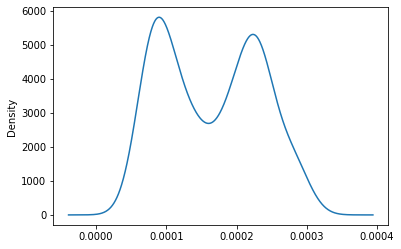

In [111]:
nh3.plot(kind='kde')

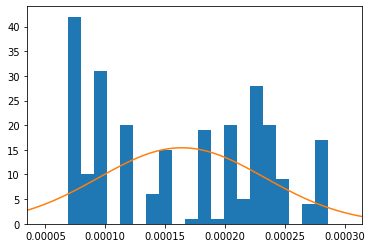

In [39]:
import numpy as np

from scipy.stats import norm

result = plt.hist(nh3, bins=20)
plt.xlim((min(nh3)/2, max(nh3)*1.1))

mean = np.mean(nh3)
variance = np.var(nh3)
sigma = np.sqrt(variance)
x = np.linspace(min(nh3)/2, max(nh3)*1.1, 100)
dx = result[1][1] - result[1][0]
scale = len(nh3)*dx
plt.plot(x, norm.pdf(x, mean, sigma)*scale)



In [22]:
from statsmodels.stats.stattools import jarque_bera

jb, pvalue, sk, k = jarque_bera(nh3)

2.2545662531377113e-05

In [24]:
from statsmodels.stats.diagnostic import lilliefors

ksstat, pvalue = lilliefors(nh3, dist='norm')

0.0009999999999998899

In [46]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(nh3)
pvalue

0.32997165346008384

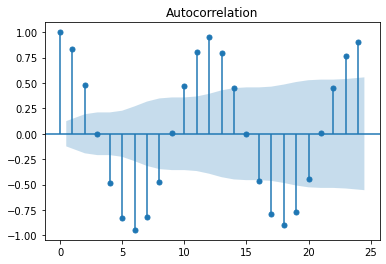

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot

plot_acf(nh3)
plt.show()

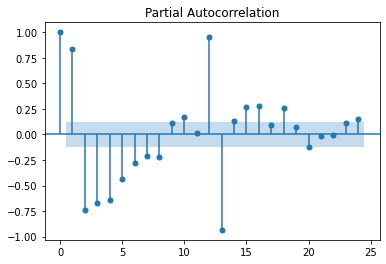

In [24]:
plot_pacf(nh3, method='ols')
plt.show()

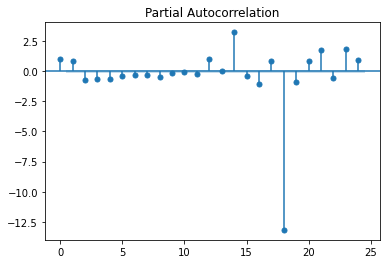

In [25]:
plot_pacf(nh3)
plt.show()

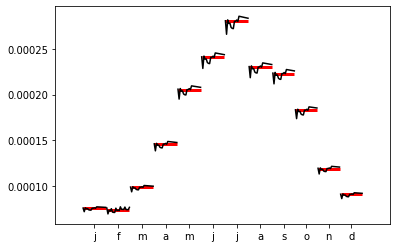

In [39]:
month_plot(nh3.to_period('M'))
plt.show()

In [49]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

nh3diff = diff(nh3, 1)

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(nh3diff)
pvalue

2.0966511636252612e-14

<AxesSubplot:ylabel='Density'>

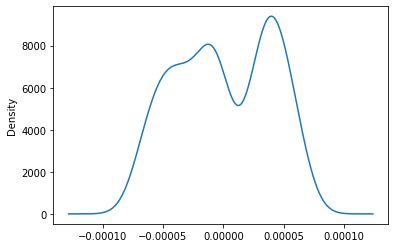

In [112]:
nh3diff.plot(kind='kde')

In [115]:
from statsmodels.stats.stattools import jarque_bera

jb, pvalue, sk, k = jarque_bera(nh3diff)
pvalue

0.00013025032412871927

In [114]:
from statsmodels.stats.diagnostic import lilliefors

ksstat, pvalue = lilliefors(nh3diff, dist='norm')
pvalue

0.0009999999999998899

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

df = pd.DataFrame(data=nh3.values, index=pd.date_range(start=nh3.index[0], periods=248, freq='M'), columns=['nh3'])
decomposition = seasonal_decompose(df, model='additive')

<AxesSubplot:>

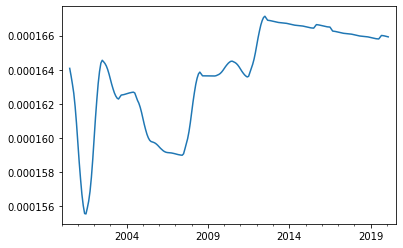

In [10]:
decomposition.trend.plot()

<AxesSubplot:>

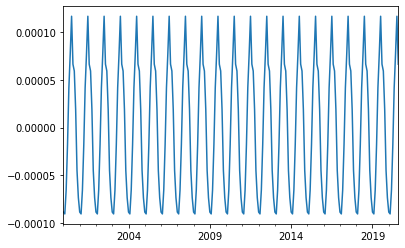

In [11]:
decomposition.seasonal.plot()

<AxesSubplot:>

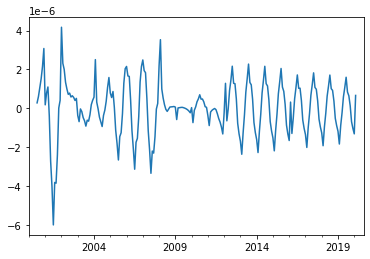

In [12]:
decomposition.resid.plot()

<AxesSubplot:>

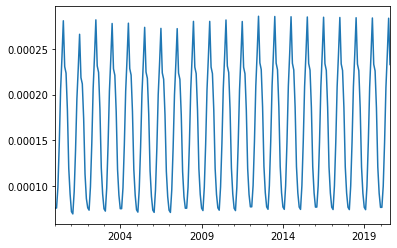

In [13]:
decomposition.observed.plot()

In [176]:
df

,nh3
2000-01-31,0.000076
2000-02-29,0.000076
2000-03-31,0.000099
2000-04-30,0.000146
2000-05-31,0.000206
...,...
2020-04-30,0.000147
2020-05-31,0.000208
2020-06-30,0.000244
2020-07-31,0.000284


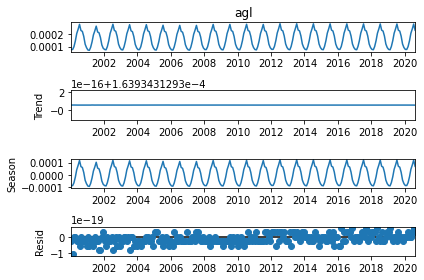

In [182]:
from statsmodels.tsa.seasonal import STL

STL(nh3, period=248).fit().plot()

plt.show()

In [6]:
nh3.to_csv('nh3.csv')

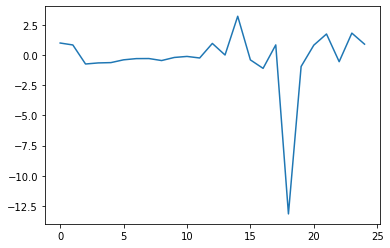

In [19]:
from statsmodels.tsa.stattools import pacf

res = pacf(nh3, 24)
plt.plot(res)

In [21]:
res

array([ 1.00000000e+00,  8.38451556e-01, -7.39233866e-01, -6.49860544e-01,
       -6.23959297e-01, -3.92977911e-01, -2.92643479e-01, -2.87032985e-01,
       -4.52695275e-01, -1.97120581e-01, -1.11479948e-01, -2.40739054e-01,
        9.65791506e-01,  6.98047610e-03,  3.21936302e+00, -3.98377266e-01,
       -1.10050601e+00,  8.43253528e-01, -1.31659644e+01, -9.45249724e-01,
        8.21915398e-01,  1.74737921e+00, -5.47078340e-01,  1.82056076e+00,
        9.05299838e-01])

<AxesSubplot:xlabel='time'>

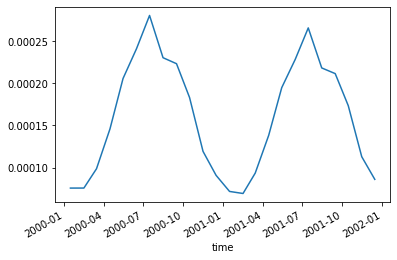

In [20]:
nh3[:24].plot()